# Perceptrons

Now that we've looked at linear regression and logistic regression, we can start learning about the fundamentals of neural networks! The simplest neural network is the **perceptron**, and it was developed by Frank Rosenblatt in 1957. The perceptron is a **binary classifier**, which is an algorithm that can classify data across two categories. In technical terms, the perceptron is a form of **supervised learning**, where we 'teach' a machine to learn some mapping between a set of input values to a set of outputs through labelled training data.

## Theory

The perceptron is an artifical neuron, in the sense that it is modelled after the biological neurons found in our brains. Below is a diagram of a biological neuron: 

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Neuron.svg/640px-Neuron.svg.png)

A biological neuron receives input signals from other neurons through its dendrites. These signals are acculumated in the cell body. If the accumulated signal exceeds a certain threshold, the neuron will 'activate' and fire an output signal which is transmitted through its axon. 

The key insights that computer scientists draw from the biological neuron is its ability to receive input, accumulate this input, then produce an output based on whether or not the accumulated input exceeds a particular threshold. Bearing these insights in mind, let's look at the architecture of a perceptron:

![title](https://www.researchgate.net/profile/Zafeirios_Fountas/publication/266485234/figure/fig2/AS:651919710224385@1532441179639/The-simplest-mathematical-model-of-a-neuron-called-the-Perceptron-30.png)

The perceptron takes in a number of inputs and calculates the weighted sum of those inputs. In a biological neuron, this step corresponds to the accumulation of the input signals in the cell body. Once the weighted sum has been calculated, we check if it exceeds a certain threshold. If it does, we fire or 'activate' the perceptron to produce an output. This step is implemented in the **activation function** of the perceptron. There are many possible activation functions we can choose from to implement in our perceptron. An example would be the sigmoid activation function, which you have come across already when you learned about logistic regression. But to keep things simple for now, we will implement what is known as the **unit-step** activation function, which looks like this:

![title](https://miro.medium.com/max/762/1*K9QJmeG33SvQeJgPa52mmQ.png)

As we can see, after a certain threshold (in this case 0) the function immediately jumps to 1 and 'activates', just like a biological neuron! 

So we now know the basic structure of a perceptron. But what is the input, and what is the output exactly? The input is the data we use to classify whatever it is we're trying to classify ($x_{i}$), and the output is the perceptron's prediction of what the class of the input should be (1 or 0). More specifically, the input is a **feature vector**, meaning it is a vector that contains some information about the object we are classifying. For instance, if we were trying to determine whether a dog is a mammal or a bird, we might use some data about its features to help us. Dogs have four legs, and unlike birds they don't have wings. From data like this, a perceptron might make the prediction that dogs are mammals. Of course, it would be right, and it would seem like our job is done. But what if it was wrong?

This is where **weights** come in. Weights are the essential mechanism behind a perceptron's ability to 'learn'. One weight is assigned to each feature in the input feature vector, and each weight represents the relative importance of that feature to the classification of our input object. Remember that the perceptron calculates a weighted sum to determine whether or not it should activate. Since this sum is dependent on the perceptron's weights, a change in even one weight might make the difference in causing the perceptron to activate or not. As a result, the task of 'learning' becomes a matter of adjusting the perceptron's weights accordingly to minimise its  errors in classification. In other words, when we 'train' a perceptron, we are simply letting it automatically learn or find the configuration of weights that yields the most accurate classifications of the training data in order to prepare it well when it eventually has to classify unseen data. Importantly, the threshold of the activation function itself can be treated as a weight. Formally, since the activation function is $z \geq \theta$ (where z is the weighted sum and $\theta$ is the threshold) we can rearrange this so that $z + (-\theta*1) \geq 0$. The $(-\theta*1)$ term is referred to as the **bias**.   

So how does a perceptron adjust its weights? Rosenblatt designed the **perceptron learning rule** for this:

\begin{equation}
\Delta w_{j} = \eta(target_{i} - output_{i})x_{ij}
\end{equation}

where $\eta$ is the **learning rate** of the perceptron, $target_{i}$ is the target sample, $output_{i}$ is the perceptron's prediction and $x_{ij}$ is the feature input associated with the weight we are adjusting. From this formula, we can see that if the perceptron's prediction is the same as the target value (i.e both are either 1 or 0), then $\Delta w_{j}$ will be 0 meaning the weight does not need to be adjusted at all. This makes sense since the perceptron's prediction was already correct! But if the perceptron was wrong (e.g. its prediction was 1 when the target is 0 or its prediction was 0 when the target is 1), then the weights would be adjusted to produce a result that is closer to the target, since $target_{i}-output_{i}$ will either be 1 or -1. As for the learning rate of the perceptron, this is a constant which acts as a multiplier for $\Delta w_{j}$. The higher $\eta$ is, the higher $\Delta w_{j}$ will be.  


Let's now move on to the code so we can implement our own perceptron! 

## Let's code!

### The Iris dataset

Before implementing our perceptron, we need some data. The Iris dataset is a small dataset which contains some information about 150 various iris plants of three types: setosa, versicolor and virginica. The first 50 samples in the dataset are setosa samples, the next 50 are versicolor, and the final 50 are virginica. For our purposes, we will focus on classifying whether an iris is setosa or versicolor, and ignore the data on virginica irises. The irises have a four features which can help us classify them. These are petal length, petal width, sepal length, and sepal width. To better visualise the linear classification problem, we will classify the irises based on only two of their features. This gives us a two-dimensional feature vector which is easy to plot!  

First, let's import everything we need:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Now let's load the Iris dataset, and only take the information about the sepal length and petal length of each iris. X is the data we will train the perceptron on, and y is the array of target values we will refer to in order to adjust the weights of our model. 

Important information:

- Each item in x is a numpy array consisting of 2 values: the sepal length and petal length of the training sample **in that order**. 
- In y, 0 represents that the ith sample is a setosa iris, while 1 represents that it is a versicolor iris. 

In [2]:
iris_data = load_iris(return_X_y=True, as_frame=True)
print('\nSetosa data:\n')
print(iris_data[0].iloc[:50, [0,2]])
print('\nVersicolor data:\n')
print(iris_data[0].iloc[50:100, [0,2]])
X = iris_data[0].iloc[:100, [0,2]].to_numpy()
y = [x for x in iris_data[1] if x == 0 or x == 1]


Setosa data:

    sepal length (cm)  petal length (cm)
0                 5.1                1.4
1                 4.9                1.4
2                 4.7                1.3
3                 4.6                1.5
4                 5.0                1.4
5                 5.4                1.7
6                 4.6                1.4
7                 5.0                1.5
8                 4.4                1.4
9                 4.9                1.5
10                5.4                1.5
11                4.8                1.6
12                4.8                1.4
13                4.3                1.1
14                5.8                1.2
15                5.7                1.5
16                5.4                1.3
17                5.1                1.4
18                5.7                1.7
19                5.1                1.5
20                5.4                1.7
21                5.1                1.5
22                4.6                1.0
2

The code below plots the data above in a graph with matplotlib. If you're interested in learning how to draw plots in Python, matplotlib is a great place to start! As we can see, the setosa and versicolor samples can easily be partitioned into two categories by a line! This means that the data we're working with is **linearly separable**.   Our peceptron's job is to find a line such that the data is separated into two classes with the highest accuracy possible. If our data is not linearly separable, then the perceptron will not **converge**, which just means it will have failed to find a solution to classify or **linearly separate** the training data perfectly. So, for future reference, to maximise the utility of a perceptron, we should make sure that the data we want to classify is linearly separable first.   

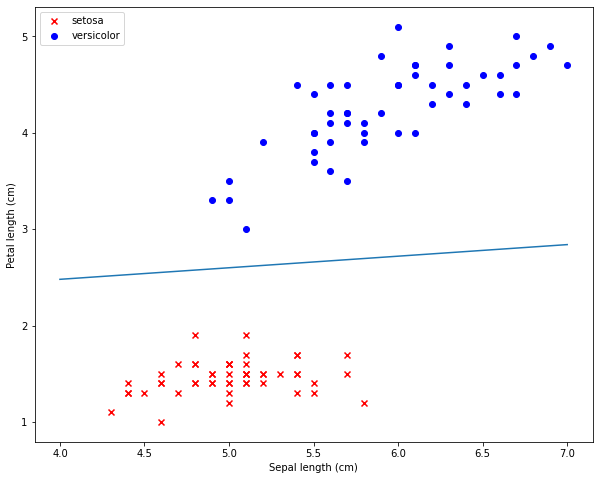

In [3]:
plt.figure(figsize=(10,8))

setosa_x = [x[0] for x in X[:50]]
setosa_y = [x[1] for x in X[:50]]
versicolor_x = [x[0] for x in X[50:100]]
versicolor_y = [x[1] for x in X[50:100]]

def calculate_ys(m, c, xs):
    ys = [(m*x)+c for x in xs]
    return ys

def plot_figure(x1, y1, x2, y2):
    plt.scatter(x1, y1, color='red', marker='x', label='setosa')
    plt.scatter(x2, y2, color='blue', marker='o', label='versicolor')
    axes = plt.gca()
    plt.plot(np.arange(int(axes.get_xlim()[0]), int(axes.get_xlim()[1]+1)), 
             calculate_ys(0.12,2,np.arange(int(axes.get_xlim()[0]), int(axes.get_xlim()[1]+1))))
    plt.xlabel('Sepal length (cm)')
    plt.ylabel('Petal length (cm)')
    plt.legend(loc='upper left')

plot_figure(setosa_x, setosa_y, versicolor_x, versicolor_y)

## Implementing the perceptron

In the cell below, a `CustomPerceptron` class has been defined, with some skeleton code. It is up to you to implement the `activate` and `fit` functions. In the `fit` function, you should also count the number of errors the model makes every epoch, and store it in the `errors` variable of the class. After the perceptron has been trained, you can then plot the number of errors per epoch with the `plot_errors` function to see the model converge. Ask our tutors for help if you need any!

In [4]:
class CustomPerceptron:
    
    #########################################################
    
    # DO NOT TOUCH
    
    def __init__(self, b, lr, e):
        self.bias = -b 
        self.learning_rate = lr
        self.epochs = e
        self.W = None
        self.errors = []
        
    def get_weights(self):
        return 'the weights of the model are currently {}\n'.format(self.W)
        
    def plot_errors(self):
        x = [i+1 for i in range(self.epochs)]
        plt.figure(figsize=(8,6))
        plt.plot(x, self.errors, color='blue', marker='o')
        plt.xlim(1, self.epochs)
        plt.xlabel('Epochs')
        plt.ylabel('No. of misclassifications')
    
    #########################################################
    
    def activate(self, x):
        # TODO
        pass
                
    def fit(self, X, y):
        # randomly initialise the weights
        self.W = np.ones(X.shape[1])
        for e in range(self.epochs):
            print('Epoch {}: {}'.format(e+1, self.get_weights()))
            
            # TODO
            # for each training sample, 
            # generate a prediction;
            # calculate delta w_j;
            # update the weights and bias;
            # keep track of errors
            pass

Below, the CustomPerceptron class has been instantiated in the variable `custom_p`, with some default parameters. Fit the model to the training data and plot the number of errors in each epoch. Feel free to play around with these parameters to see how the weights and errors change!  

In [5]:
# Default params: bias = 0, learning rate = 0.1, epochs = 10

custom_p = CustomPerceptron(0, 0.1, 10)

# TODO

## Testing!

Now that we've trained the perceptron, we can use it to classify some new samples it hasn't seen before! Below are 5 new flowers. Use the `activate_test` function from the CustomPerceptron class to make these predictions. Remember that each sample is represented as a numpy array consisting of two features, the first being the sample's sepal length and the second being its petal length. 

Some questions to keep in mind:

- Does the perceptron classify the new samples in the way you would expect? i.e. if you were to classify the new samples as setosa and versicolor based on the data we have from the Iris dataset, would it be the same as the perceptron's prediction?
- Consider examples 4 and 5. How does the perceptron classify them and why has it classified them that way?  

In [6]:
new_flower_1 = np.array([7.4, 4.2])

new_flower_2 = np.array([4.3, 1.6])

new_flower_3 = np.array([4.8, 1.7])

new_flower_4 = np.array([6.8, 1.6])

new_flower_5 = np.array([5.8, 4.6])

# TODO